<a href="https://colab.research.google.com/github/Hemraj-Sukriya/Titanic-/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Machine Learning Project**

In [ ]:
#Importing Library
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:

#Load Data Set
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#Count the number of Row and Columns 
titanic.shape

(891, 15)

In [ ]:
#Get the Statical Summary
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#Get the Statical Summary of categorical Variable 
titanic.describe(include=[object])

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [ ]:
#Get a  count of the number of surviver 
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

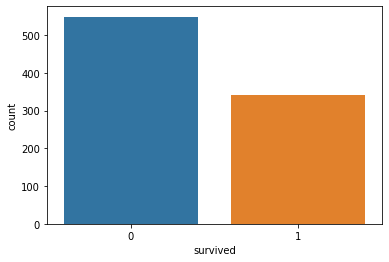

In [ ]:
#Visulazation
#Visulazation of Surviver
sns.countplot(titanic["survived"])

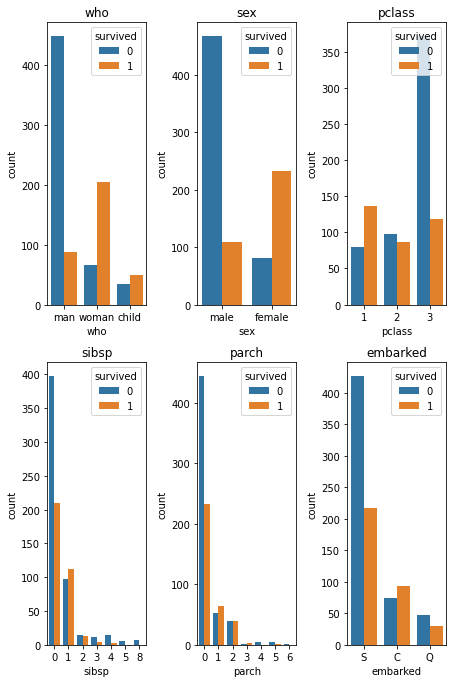

In [ ]:
#Visulatization  of surviver for columns 'who', 'sex', 'pclass', 'sibsp', 'parch', and 'embarked'
col=['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']
nrow=2
ncol=3
fig,axs=plt.subplots(nrow,ncol,figsize=(nrow*3.2,ncol*3.2))
for r in range(0,nrow):
  for c in range(0,ncol):
    i=r*ncol+c
    ax=axs[r][c]
    sns.countplot(titanic[col[i]],hue=titanic["survived"],ax=ax)
    ax.set_title(col[i])
    ax.legend(title="survived", loc='upper right') 
      
plt.tight_layout()

In [ ]:
#Analysis of Surviver
df=titanic[["survived","sex","class"]]
df.groupby(["sex"]).mean()


,survived
sex,
female,0.742038
male,0.188908


In [ ]:
df.groupby(["sex","class"],as_index=False).mean()

,sex,class,survived
0,female,First,0.968085
1,female,Second,0.921053
2,female,Third,0.500000
3,male,First,0.368852
4,male,Second,0.157407
5,male,Third,0.135447


In [ ]:
#Look at survival rate by sex and class using Pivot table
df.pivot_table("survived",index="sex",columns="class")

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [ ]:
#Look at survival rate by sex,age  and class using Pivot table
age=pd.cut(titanic["age"],[0,18,80])
titanic.pivot_table("survived",["sex",age],columns="class")

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

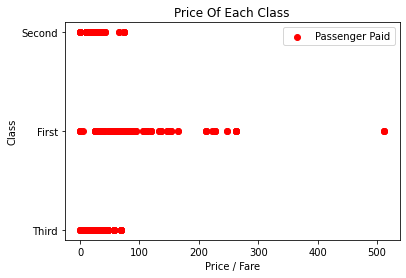

In [ ]:
#Plot the Prices Paid Of Each Class
  plt.scatter(titanic['fare'], titanic['class'],  color = 'red', label='Passenger Paid')
  plt.ylabel('Class')
  plt.xlabel('Price / Fare')
  plt.title('Price Of Each Class')
  plt.legend()
  plt.show()

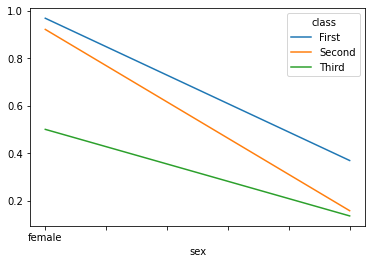

In [ ]:
#plot the pivot table 
df.pivot_table("survived",index="sex",columns="class").plot()

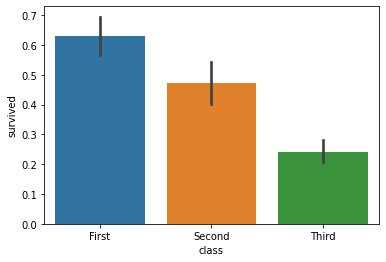

In [ ]:
#plot the survival rate of class using Box plot 
sns.barplot(x="class",y="survived",data=titanic)

In [ ]:
#Correlation Between titanic Variable
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


Analysis of missing Varibale

In [ ]:
#cheak the missing values 
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
for val in titanic:
   print(titanic[val].value_counts())
   print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [ ]:
# Drop the  Reductant columns and "deck " with deck has lot of  missing values 
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'alone', 'adult_male', 'who'], axis=1)


In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
titanic.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
dtype: int64

In [ ]:
#Remove the rows with missing values
titanic = titanic.dropna(subset =['embarked', 'age'])

In [ ]:
titanic.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [ ]:
#Cheak the Shape of Dataframe after cleaning Data
titanic.shape

(712, 8)

In [ ]:
#Data Type of titanic
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
print(titanic["embarked"].unique())
print(titanic["sex"].unique())

['S' 'C' 'Q']
['male' 'female']


In [ ]:
#Encoding Categorical Data 
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
#Encode Embarked Column
titanic.iloc[:,7]=labelencoder.fit_transform(titanic.iloc[:,7])
#Encode Sex Columns
titanic.iloc[:,2]=labelencoder.fit_transform(titanic.iloc[:,2])

In [ ]:
titanic[["embarked","sex"]].head()

,embarked,sex
0,2,1
1,0,0
2,2,0
3,2,0
4,2,1


In [ ]:
print(titanic["embarked"].unique())
print(titanic["sex"].unique())

[2 0 1]
[1 0]


In [ ]:
#deviding Data into Independent X  and Dependent Variable Y 
X=titanic.iloc[:,1:8]
Y=titanic.iloc[:,0] 

In [ ]:
#Spliting the Data into Training and testing Data 
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
#feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xtrain=sc.fit_transform(Xtrain)
Xtest=sc.fit_transform(Xtest)

Creating Models And fit with Training Data and Evoluting test Data

---



In [ ]:
#Importing the Metrics Library to cheak the Accuracy of our Model 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix 

In [ ]:
#Using Logisitic Alogorithms 
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(Xtrain,Ytrain)
yhatLog=LR.predict(Xtest)
cmlog=confusion_matrix(Ytest,LR.predict(Xtest))

In [ ]:
#cheak the Accuracy of model
print("Logistic Jaccard index: %.2f" % jaccard_similarity_score(Ytest,LR.predict(Xtest)))
print("Logostic F1-score: %.2f" % f1_score(Ytest,LR.predict(Xtest), average='weighted') )
print("Logistic Lolgloss : %.2f" % log_loss(Ytest,LR.predict_proba(Xtest)))
print("Confusion metrix") 
print( cmlog)

Logistic Jaccard index: 0.82
Logostic F1-score: 0.81
Logistic Lolgloss : 0.45
Confusion metrix
[[75  7]
 [19 42]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(Xtrain, Ytrain)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#cheak the Accuracy of model
print("Knn Jaccard index: %.2f" % jaccard_similarity_score(Ytest,knn.predict(Xtest)))
print("Knn F1-score: %.2f" % f1_score(Ytest,knn.predict(Xtest), average='weighted') )
print("Knn Lolgloss : %.2f" % log_loss(Ytest,knn.predict_proba(Xtest)))
print("Confusion metrix") 
print(confusion_matrix(Ytest,knn.predict(Xtest)))

Knn Jaccard index: 0.76
Knn F1-score: 0.75
Knn Lolgloss : 1.84
Confusion metrix
[[67 15]
 [20 41]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
#Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(Xtrain, Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(Ytest,svc_lin.predict(Xtest)))
print("SVM F1-score: %.2f" % f1_score(Ytest,svc_lin.predict(Xtest), average='weighted') )
print("Confusion metrix") 
print(confusion_matrix(Ytest,svc_lin.predict(Xtest)))

SVM Jaccard index: 0.79
SVM F1-score: 0.79
Confusion metrix
[[70 12]
 [18 43]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
#Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(Xtrain, Ytrain)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print("SVM rbf Jaccard index: %.2f" % jaccard_similarity_score(Ytest,svc_rbf.predict(Xtest)))
print("SVM rbf F1-score: %.2f" % f1_score(Ytest,svc_rbf.predict(Xtest), average='weighted') )
print("Confusion metrix") 
print(confusion_matrix(Ytest,svc_rbf.predict(Xtest)))

SVM rbf Jaccard index: 0.80
SVM rbf F1-score: 0.79
Confusion metrix
[[75  7]
 [22 39]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
#Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(Xtrain, Ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print("GaussianNB Jaccard index: %.2f" % jaccard_similarity_score(Ytest,gauss.predict(Xtest)))
print("GaussianNB F1-score: %.2f" % f1_score(Ytest,gauss.predict(Xtest), average='weighted') )
print("Confusion metrix") 
print(confusion_matrix(Ytest,gauss.predict(Xtest)))

GaussianNB Jaccard index: 0.72
GaussianNB F1-score: 0.71
Confusion metrix
[[69 13]
 [27 34]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
#Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(Xtrain, Ytrain)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print("Decision Tree Jaccard index: %.2f" % jaccard_similarity_score(Ytest,tree.predict(Xtest)))
print("Decision Tree F1-score: %.2f" % f1_score(Ytest,tree.predict(Xtest), average='weighted') )
print("Confusion metrix") 
print(confusion_matrix(Ytest,tree.predict(Xtest)))

Decision Tree Jaccard index: 0.72
Decision Tree F1-score: 0.72
Confusion metrix
[[54 28]
 [12 49]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
#Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
print("RandomForest Jaccard index: %.2f" % jaccard_similarity_score(Ytest,forest.predict(Xtest)))
print("RandomForest F1-score: %.2f" % f1_score(Ytest,forest.predict(Xtest), average='weighted') )
print("Confusion metrix") 
print(confusion_matrix(Ytest,forest.predict(Xtest)))

RandomForest Jaccard index: 0.84
RandomForest F1-score: 0.84
Confusion metrix
[[73  9]
 [14 47]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [ ]:
#Get the importance of the features

importances = pd.DataFrame({'feature':titanic.iloc[:, 1:8].columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030
